In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("city_day.csv")

In [3]:
df.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [7]:
#convert data into datetime and handle missing values
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [8]:
#drop rows with invalid values
df = df.dropna(subset=['Date'])

In [9]:
#fill missing pollutant values
df.fillna(0, inplace=True)

**feature engineering**


In [10]:
df['Year'] = df['Date'].dt.year

In [11]:
df['Month'] = df['Date'].dt.month

**Average Pollutant levels by years**

In [12]:
avg_pollution_by_city = df.groupby('City')[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].mean()

In [13]:
top10_polluted = avg_pollution_by_city.sort_values(by='PM2.5', ascending=False).head(10)

** PM2.5 Trend over Years (Top 5 Cities)**

In [14]:
top5_cities = top10_polluted.head(5).index

In [15]:
pm25_trend = df[df['City'].isin(top5_cities)].groupby(['Year', 'City'])['PM2.5'].mean().reset_index()


**Correlation Matrix**

In [17]:
correlation = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].corr()

In [18]:
#Monthly Seasonal Analysis
seasonal_pm25 = df.groupby('Month')['PM2.5'].mean ()

**Visualization**

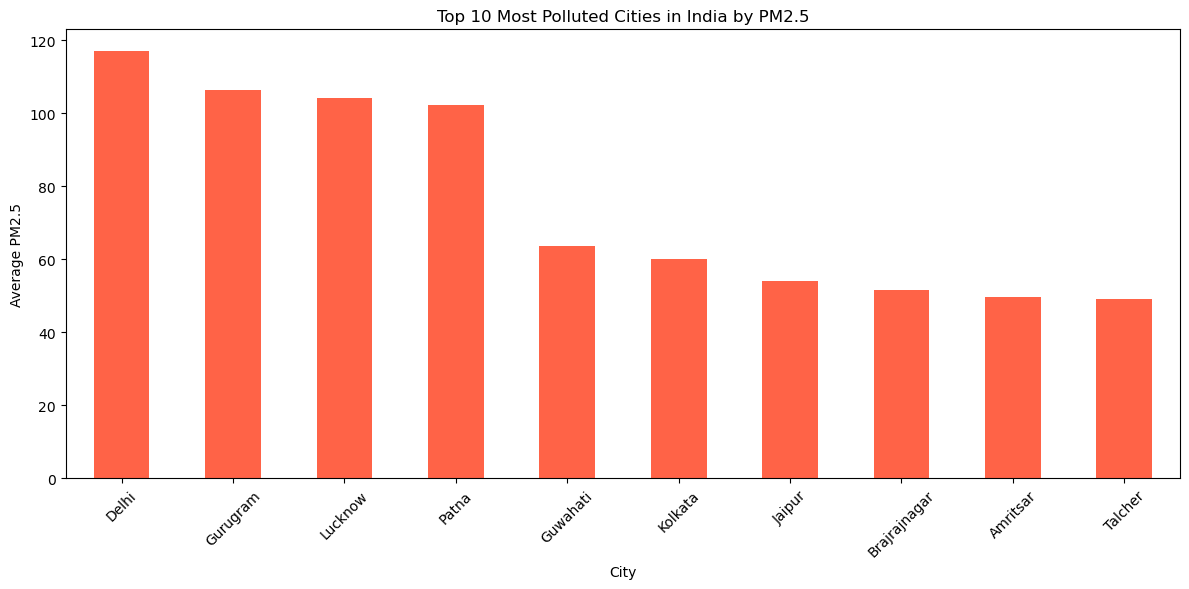

In [19]:
#Top 10 polluted Cities by PM2.5
plt.figure(figsize=(12, 6))
top10_polluted['PM2.5'].plot(kind='bar', color='tomato')
plt.title("Top 10 Most Polluted Cities in India by PM2.5")
plt.ylabel("Average PM2.5")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

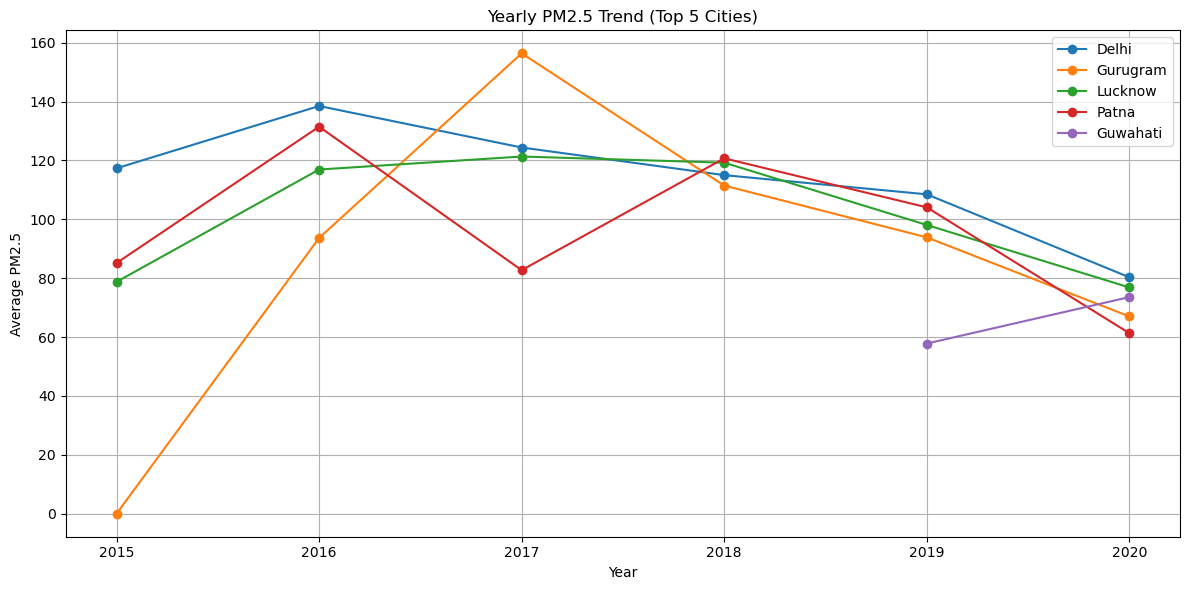

In [23]:
plt.figure(figsize=(12, 6))

for city in top5_cities:
    city_data = pm25_trend[pm25_trend['City'] == city]
    plt.plot(city_data['Year'], city_data['PM2.5'], label=city, marker='o')

plt.title("Yearly PM2.5 Trend (Top 5 Cities)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5")
plt.legend()  # This adds the color-coded city labels
plt.grid(True)
plt.tight_layout()
plt.show()


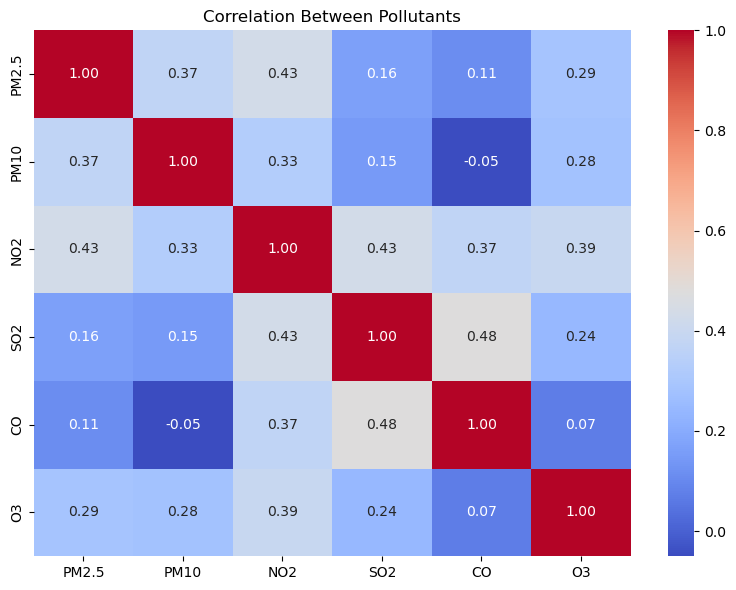

In [25]:
# Correlation Heatmap of Pollutants
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Pollutants")
plt.tight_layout()
plt.show()

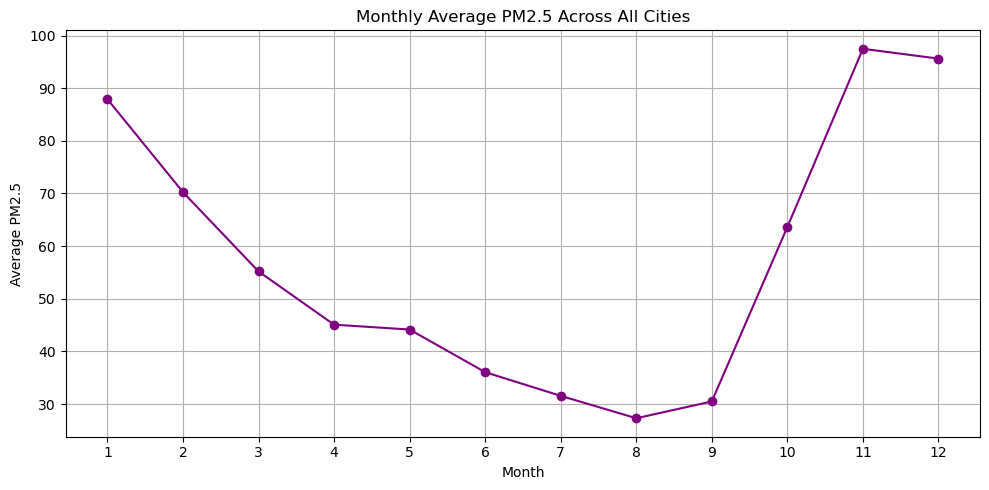

In [27]:
# Monthly PM2.5 Trend
plt.figure(figsize=(10, 5))
seasonal_pm25.plot(marker='o', color='purple')
plt.title("Monthly Average PM2.5 Across All Cities")
plt.xlabel("Month")
plt.ylabel("Average PM2.5")
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

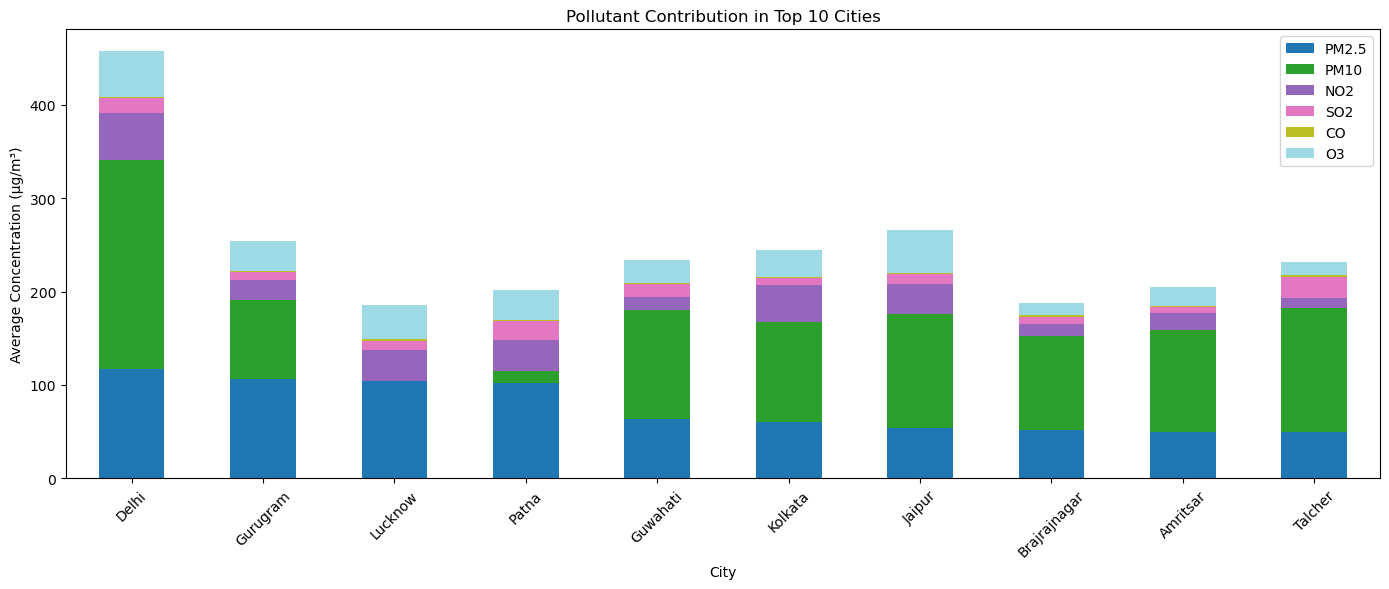

In [29]:
# Shows the proportion of each pollutant (PM2.5, NO₂, etc.) in each city.
pollutant_avg = df.groupby('City')[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].mean()
pollutant_avg_top = pollutant_avg.loc[top10_polluted.index]

pollutant_avg_top.plot(kind='bar', stacked=True, figsize=(14,6), colormap='tab20')
plt.title("Pollutant Contribution in Top 10 Cities")
plt.ylabel("Average Concentration (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


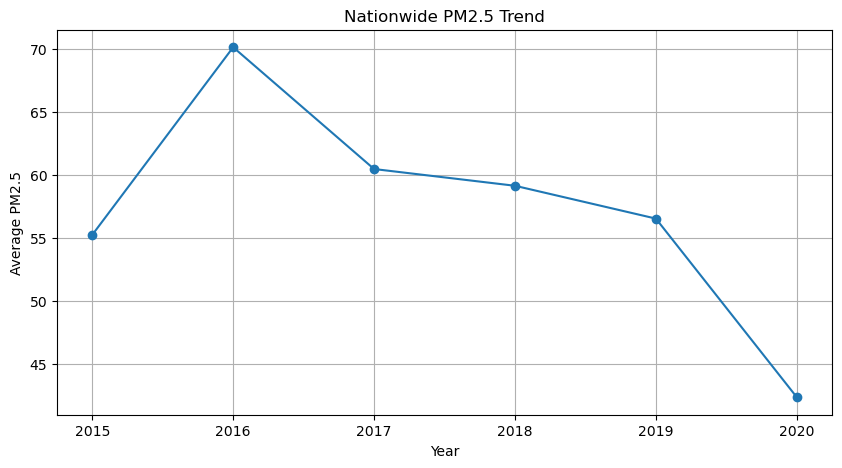

In [30]:
# Overall decline or increase in PM2.5 over years.
yearly_pm25 = df.groupby('Year')['PM2.5'].mean()
yearly_pm25.plot(marker='o', figsize=(10,5), title='Nationwide PM2.5 Trend')
plt.ylabel("Average PM2.5")
plt.grid()
plt.show()


C:\Users\SAINI\AppData\Local\Temp\ipykernel_19652\3832923968.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='AQI', data=df, palette='coolwarm')


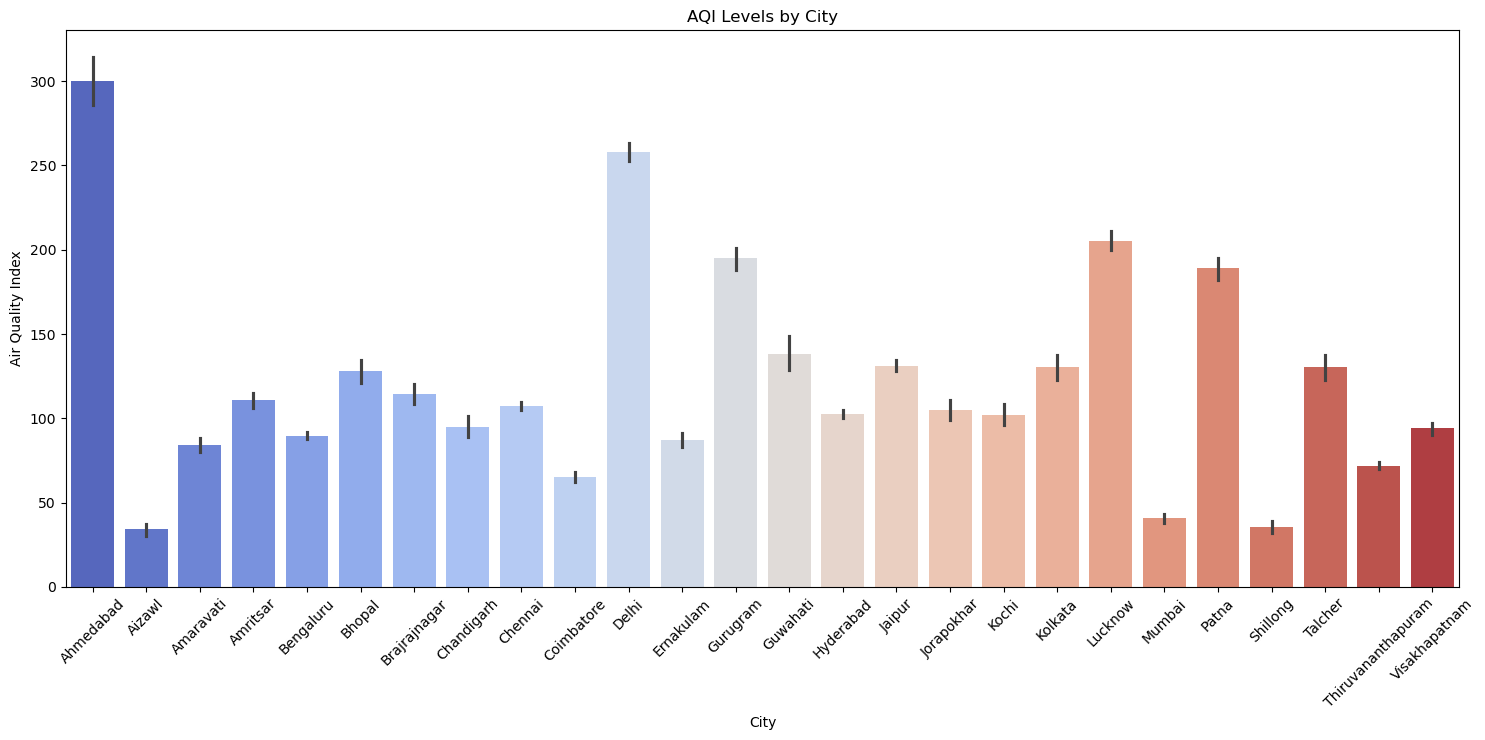

In [40]:
# Bar chart for AQI by city
plt.figure(figsize=(15, 7.5))
sns.barplot(x='City', y='AQI', data=df, palette='coolwarm')
plt.title('AQI Levels by City')
plt.ylabel('Air Quality Index')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()